# Summary

Recall that raw bits generated from oscillator-based TRNG are sampled first digits of Brownian motion with drift.

How does this drift impact pseudorandom properties and autocorrelation?

Note that we don't want pseudorandom properties of the drift to fool us :-)

In [1]:
try:
    from importlib.resources import files
except:
    from importlib_resources import files
from deep_correlations_trng.utils import read_bits
from deep_correlations_trng import data

from statsmodels.graphics.tsaplots import acf,plot_acf
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')


plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'

data_files = files(data).joinpath('experiment1').rglob('*.bin')
data_files = list(data_files)
data_files

[PosixPath('/Users/maciejskorski/Documents/autocorrelations_trng/src/deep_correlations_trng/data/experiment1/acq_20230118155612_dff.bin'),
 PosixPath('/Users/maciejskorski/Documents/autocorrelations_trng/src/deep_correlations_trng/data/experiment1/acq_20230118155436_dff.bin')]

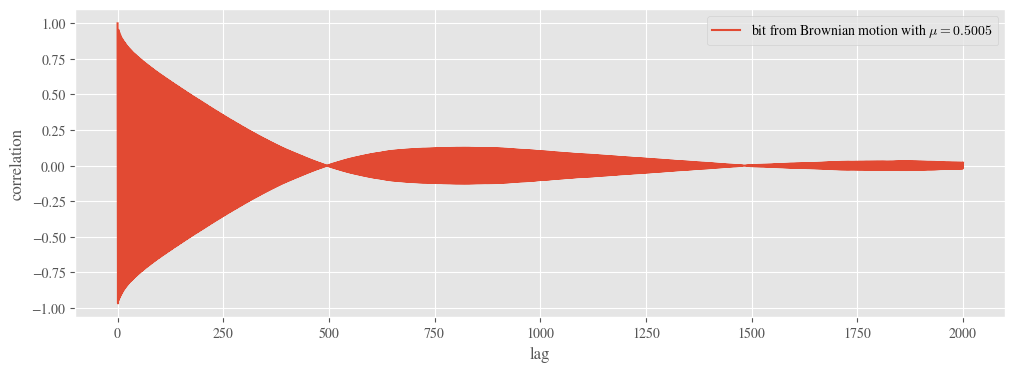

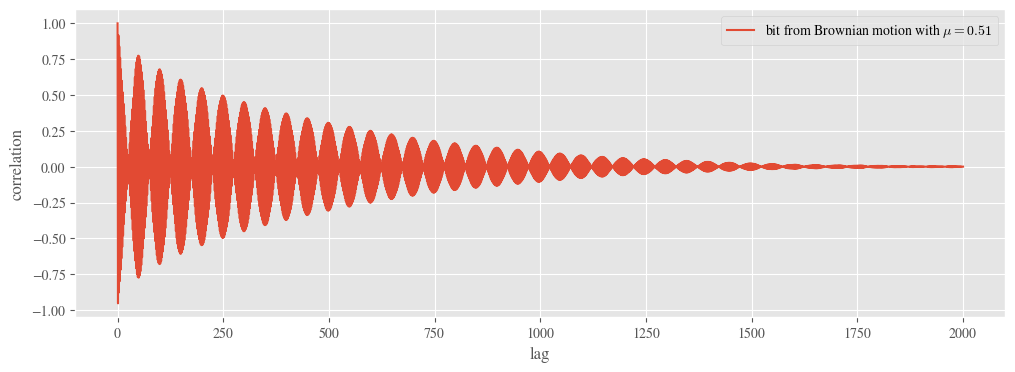

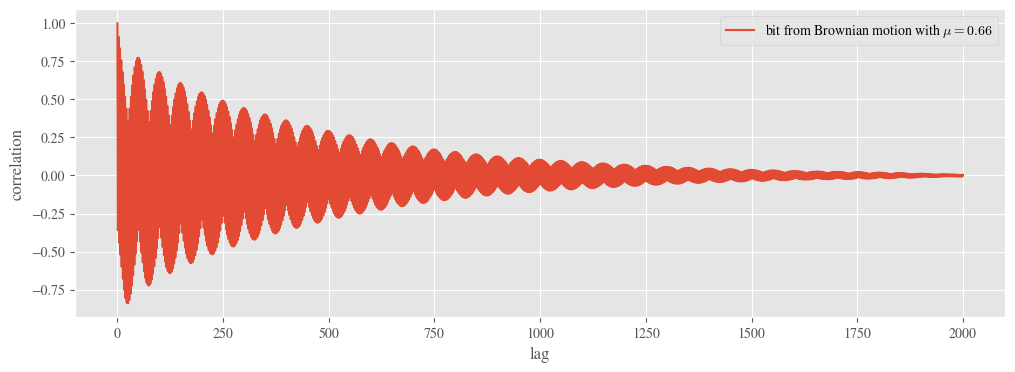

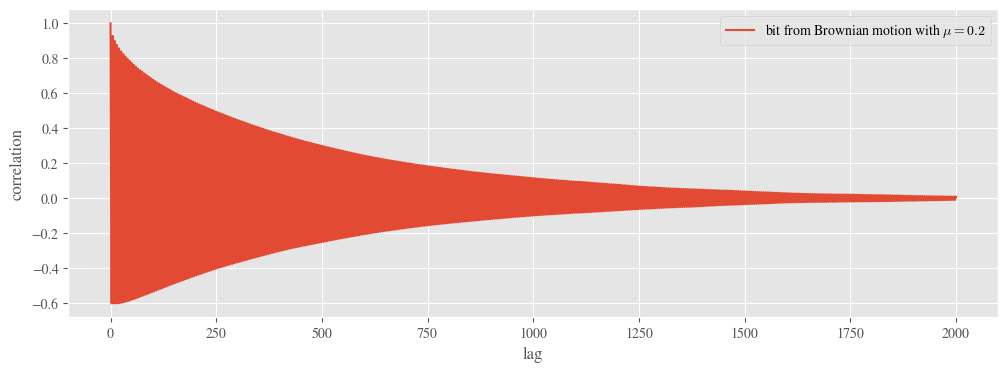

In [197]:
sigma = 0.01
for mu in [0.5005,0.51,0.66,0.2]:
    location = np.cumsum(np.random.normal(mu,sigma,size=(1000000)))
    phases = (0.0+location)%1
    bits = (phases < 1/2).astype('int')
    fig,ax = plt.subplots(figsize=(12,4))
    nlags = 2000
    lags = np.arange(nlags+1)
    ax.plot(lags, acf(bits,nlags=nlags,fft=True),label=f'bit from Brownian motion with $\mu={mu}$')
    ax.legend()
    ax.set_xlabel('lag')
    ax.set_ylabel('correlation')
    plt.show()